In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split

## Data Overview

In [2]:
dat = pd.read_csv("data/reviews.csv")

In [3]:
len(dat)

621450

In [4]:
dat = dat.sample(n=102000,
                random_state=271)

In [5]:
train, test = train_test_split(dat,
                               test_size=2000,
                               random_state=271)

In [6]:
print(len(dat),len(train),len(test))

102000 100000 2000


In [7]:
dat = train

In [8]:
dat.groupby("genre").count()["user_id"]/len(dat)

genre
fantasy    0.46554
history    0.27756
mystery    0.25690
Name: user_id, dtype: float64

Rating Distribution

In [9]:
dat.groupby("rating").count()["user_id"]/len(dat)

rating
0    0.02681
1    0.02797
2    0.07180
3    0.20435
4    0.34660
5    0.32247
Name: user_id, dtype: float64

<AxesSubplot:>

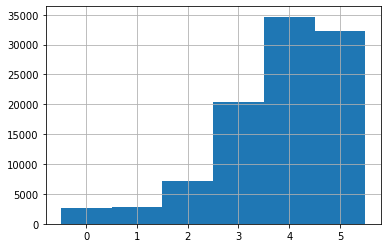

In [10]:
dat["rating"].hist(bins=np.arange(7)-0.5)

Number of Likes Distribution

In [11]:
dat["n_likes"].quantile([.25,.5,.75,.9,.95,.99])

0.25     0.0
0.50     0.0
0.75     1.0
0.90     3.0
0.95     6.0
0.99    25.0
Name: n_likes, dtype: float64

<AxesSubplot:>

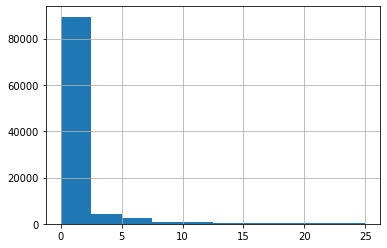

In [12]:
dat["n_likes"].hist(range=(0,25))

Frequently Occurring books/users

In [13]:
# most reviewed books in my sample
dat.groupby("book_id").count()["user_id"].sort_values()[::-1][:10]

book_id
22557272    214
19063       150
41865       145
8442457     143
9460487     137
29056083    134
18007564    127
9361589     123
11235712    119
4667024     113
Name: user_id, dtype: int64

In [14]:
dat.groupby("book_id").count()["user_id"].quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01     1.0
0.05     1.0
0.10     1.0
0.25     1.0
0.50     1.0
0.75     1.0
0.90     3.0
0.95     5.0
0.99    14.0
Name: user_id, dtype: float64

In [15]:
# most-reviews-written users in my sample
dat.groupby("user_id").count()["book_id"].sort_values()[::-1][:10]

user_id
843a44e2499ba9362b47a089b0b0ce75    69
fca26c34be8fe623ee340061f1281796    61
795595616d3dbd81bd16b617c9a1fa48    58
a45fb5d39a6a9857ff8362900790510a    47
60982541be85a0611e9634b4f63d0cb0    44
b7772313835ce6257a3fbe7ad2649a29    43
e5905d648022af7b1309d82a1f4d255b    38
a429d42a56b36e313473187d2253b0a6    37
cf9e7ec0d08bd6db6f9330378c1239bf    37
a6cbfded0f87328f3006c80941c0aca4    36
Name: book_id, dtype: int64

Review Length Distribution

In [16]:
dat["tokenized_words"] = dat["tokenized_words"].astype(str)

In [17]:
dat["tokenized_words"].apply(len).quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01      11.00
0.05      30.00
0.10      48.00
0.25     104.00
0.50     245.00
0.75     590.00
0.90    1173.00
0.95    1644.05
0.99    2887.01
Name: tokenized_words, dtype: float64

<AxesSubplot:>

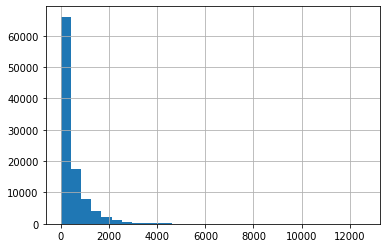

In [18]:
dat["tokenized_words"].apply(len).hist(bins=30)

## Vocabulary Overview

In [19]:
# tokenize
tokens = dat["tokenized_words"].apply(lambda review: [word for word in nltk.tokenize.word_tokenize(review)])
tokens = [word for lst in tokens for word in lst]
tokens_freq = nltk.FreqDist(tokens)

In [20]:
# vocab length
len(tokens_freq)

95607

In [21]:
# total words
sum(tokens_freq.values())

6902853

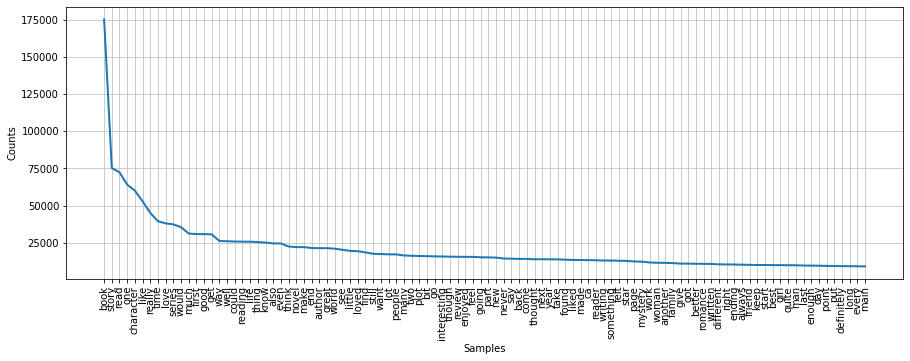

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
tokens_freq.plot(100)

In [23]:
from gensim.corpora import Dictionary

/usr/local/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [24]:
# build dictionary
dat["tokenized"] = dat["tokenized_words"].apply(lambda review: [word for word in nltk.tokenize.word_tokenize(review)])
reviews = dat["tokenized"].tolist()
dictionary = Dictionary(reviews)

In [25]:
doc_frequencies = [value/100000 for value in dictionary.dfs.values()]

In [26]:
pd.Series(doc_frequencies).quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01    0.00001
0.05    0.00001
0.10    0.00001
0.25    0.00001
0.50    0.00002
0.75    0.00007
0.90    0.00041
0.95    0.00123
0.99    0.00980
dtype: float64

In [27]:
pd.Series(doc_frequencies).sort_values()[::-1][:10]

3      0.66420
137    0.45077
167    0.38559
40     0.36324
30     0.33975
114    0.30347
13     0.27315
19     0.25328
204    0.23127
116    0.22983
dtype: float64

In [28]:
# remove top 4 most common words (in more than 35% of reviews)

In [29]:
pd.Series(dictionary.dfs.values()).quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01      1.0
0.05      1.0
0.10      1.0
0.25      1.0
0.50      2.0
0.75      7.0
0.90     41.0
0.95    123.0
0.99    980.0
dtype: float64

In [30]:
# remove words occurring in fewer than 10 reviews (maybe increase?)

In [31]:
dictionary.filter_extremes(no_below=20,no_above=0.35)

In [32]:
len(dictionary.token2id)

14737